In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math
# Ignore sklearn warning for now
import warnings
warnings.filterwarnings('ignore') 
# sns.set() # Setting seaborn as default style even if use only matplotlib
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
# matplotlib.style.use('classic')
from os import listdir
from os.path import isfile, join
import pathlib
import glob
import nibabel as nib
import scipy.ndimage as ndi

# Summary

This notebook plots the CBF grey and white matter maps generated from ASL images and extracts their overall maximum, minimum, median and variance.

In [3]:
mypath = pathlib.Path().resolve()
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [4]:
nii_files = []
for i in range(len(onlyfiles)):
    tmp_name = onlyfiles[i]
    if tmp_name.endswith(".nii"):
        nii_files.append(tmp_name)

In [5]:
len(nii_files)

66

In [6]:
def image_measures(image):
    img_avg = ndi.mean(image)
    img_med = ndi.median(image)
    img_max = ndi.maximum(image)
    img_min = ndi.minimum(image)
    img_var = ndi.variance(image)
    return img_avg, img_med, img_max, img_min, img_var

In [7]:
T1_data = pd.read_csv('T1_data_2023_01_30_MTE.csv')


In [8]:
CBF_data = T1_data[['ID', 'MRI ID']].copy()
CBF_data.insert(2, 'CFB_gm_avg', np.nan)
CBF_data.insert(3, 'CFB_gm_max', np.nan)
CBF_data.insert(4, 'CFB_gm_min', np.nan)
CBF_data.insert(5, 'CFB_gm_var', np.nan)
CBF_data.insert(6, 'CFB_wm_avg', np.nan)
CBF_data.insert(7, 'CFB_wm_max', np.nan)
CBF_data.insert(8, 'CFB_wm_min', np.nan)
CBF_data.insert(9, 'CFB_wm_var', np.nan)

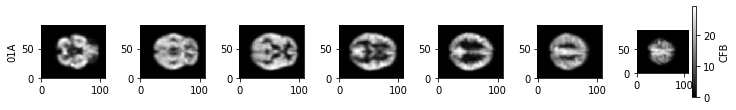

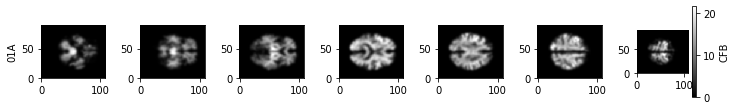

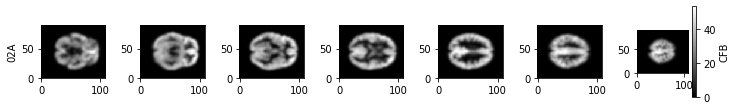

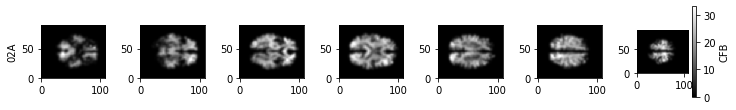

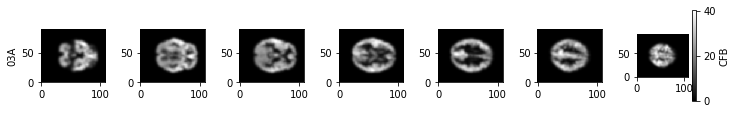

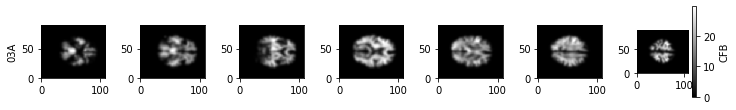

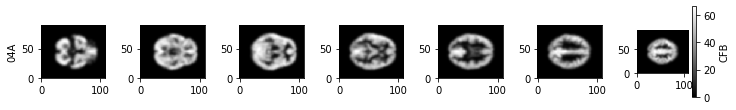

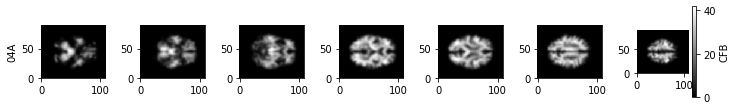

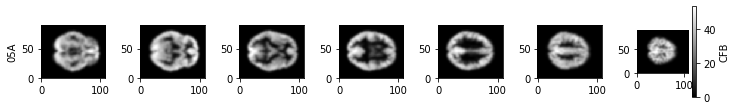

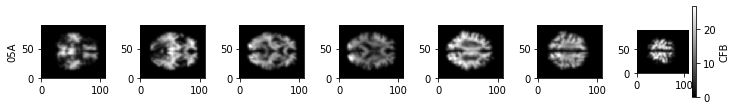

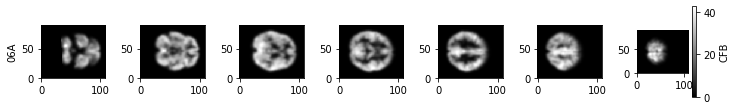

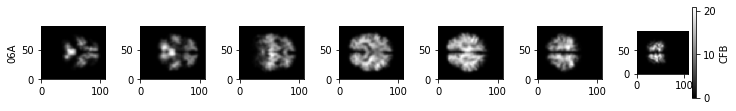

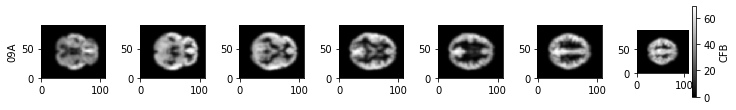

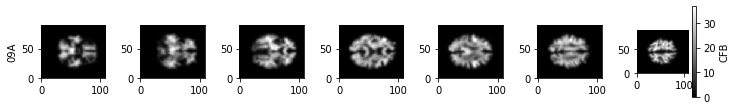

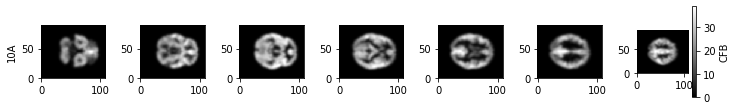

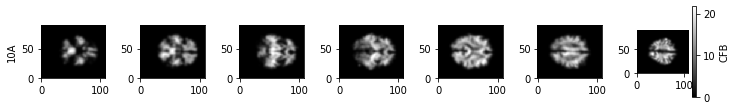

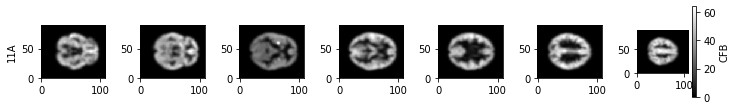

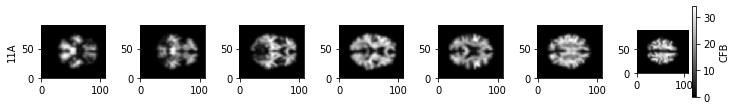

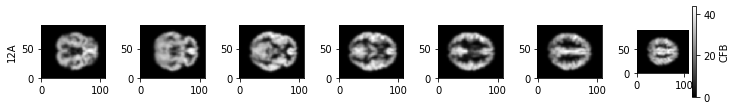

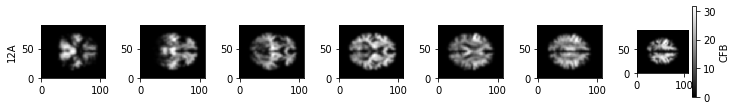

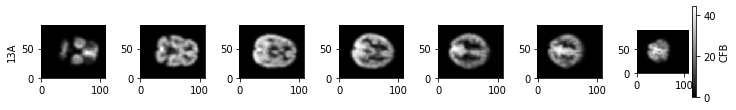

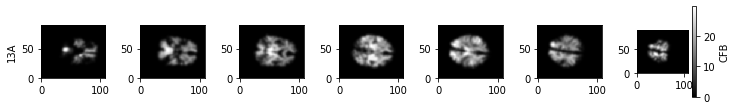

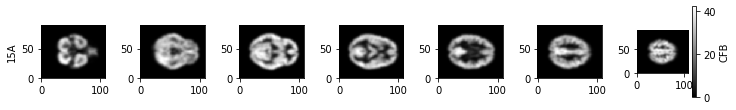

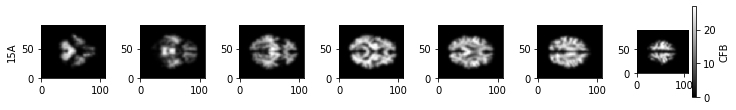

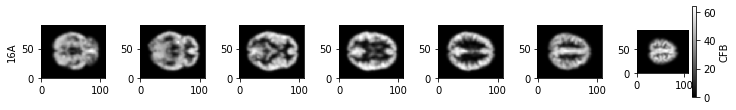

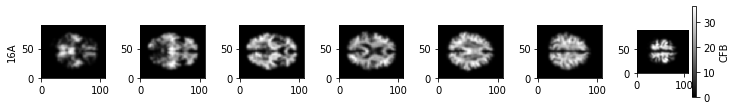

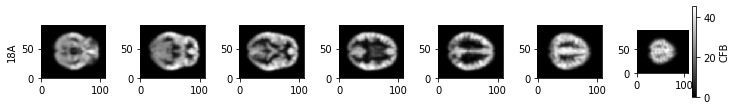

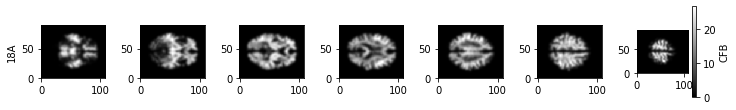

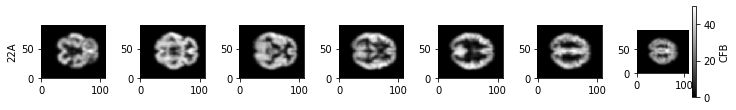

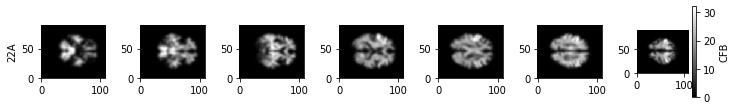

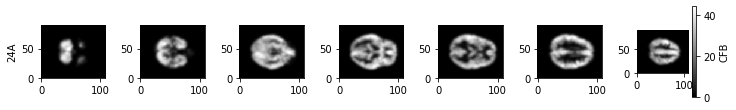

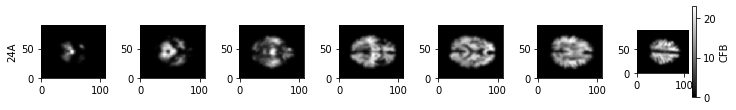

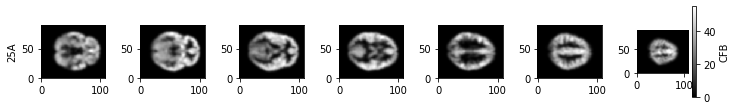

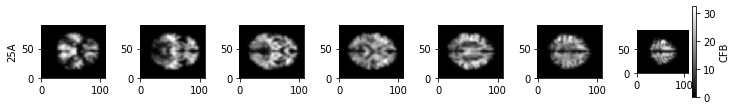

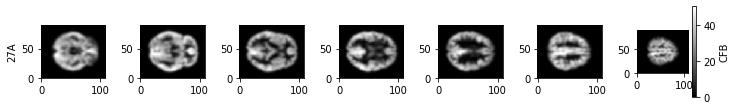

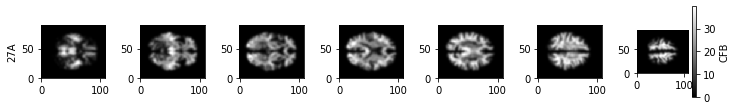

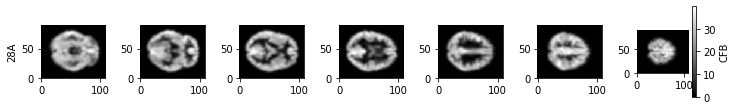

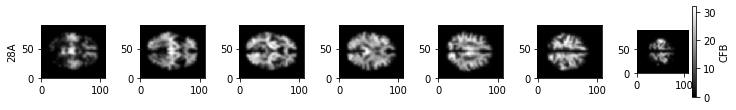

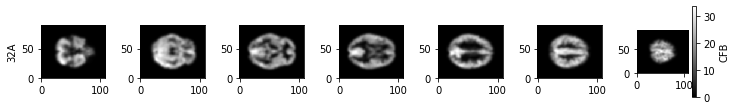

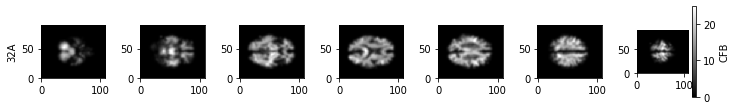

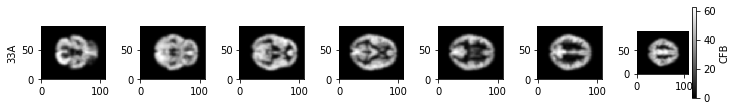

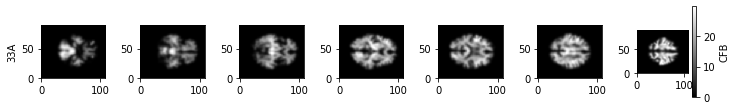

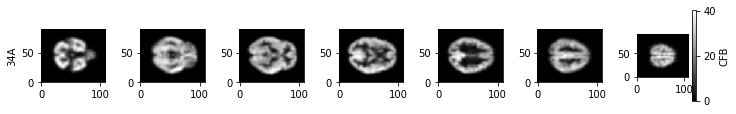

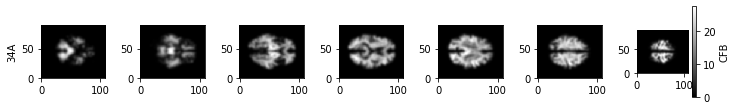

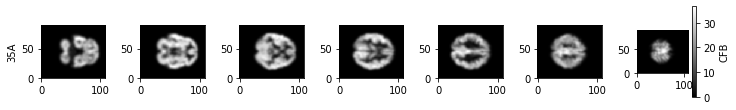

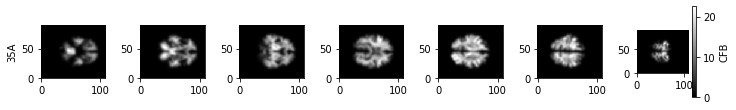

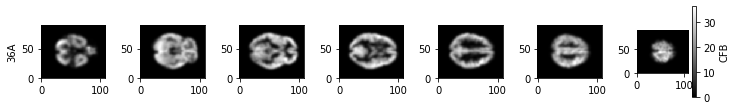

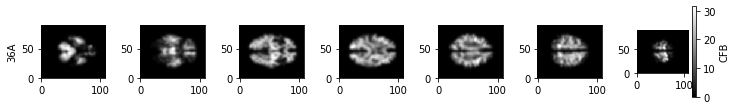

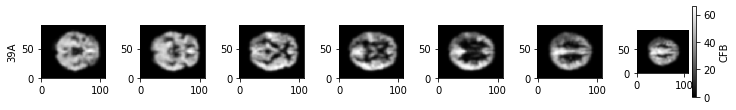

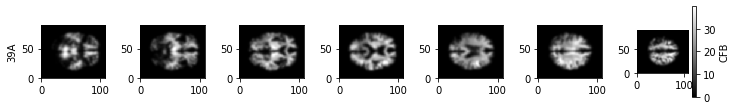

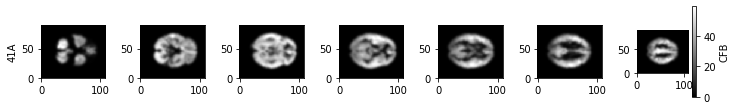

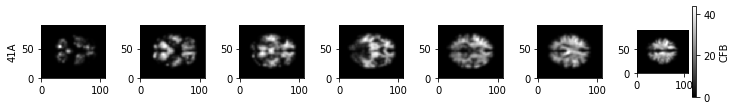

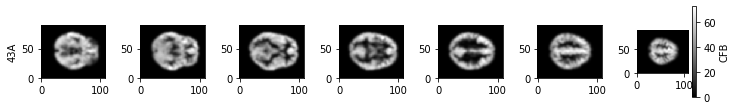

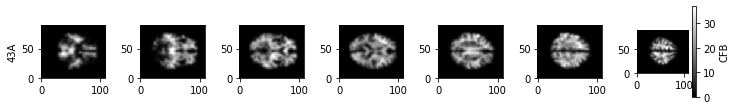

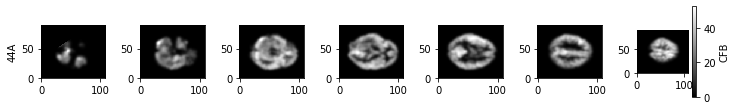

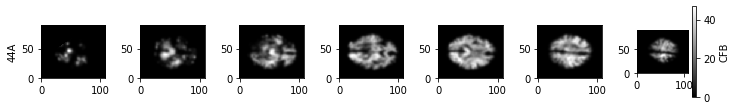

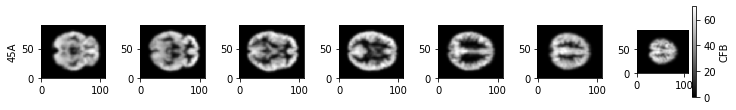

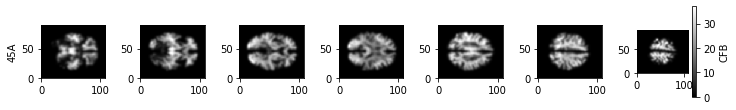

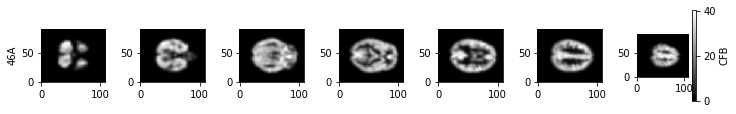

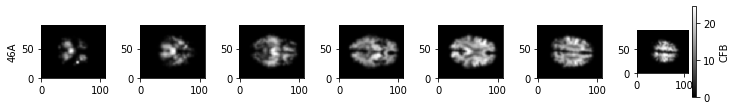

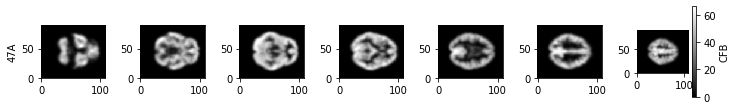

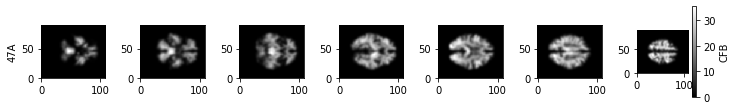

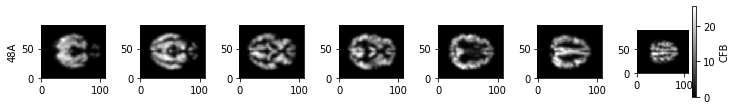

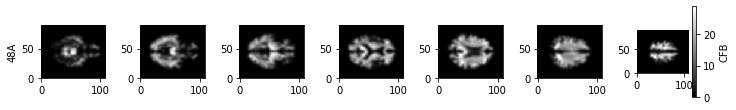

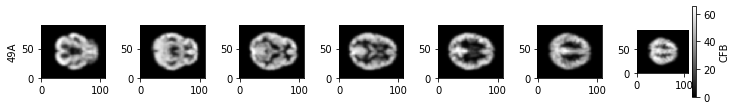

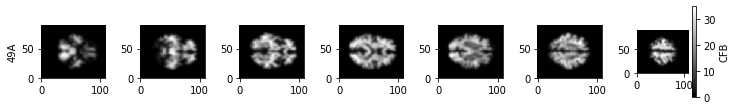

In [9]:
x = np.arange(30, 65, 5)

for i in range(len(nii_files)):
    test_load = nib.load(nii_files[i]).get_fdata() 
    name_tmp=nii_files[i].split("_")[0]
    where_are_NaNs = np.isnan(test_load)
    test_load[where_are_NaNs] = 0
    for i in range(len(x)):
        plt.subplot(len(x), len(x), i + 1)
        plt.imshow(test_load[:,:,x[i]],cmap="gray", origin="lower")
        if i == 0:
            plt.ylabel(name_tmp)
        plt.gcf().set_size_inches(10, 10)
        plt.tight_layout()
    plt.colorbar(label='CFB')
#     plt.savefig('CBF_gm_' + name_tmp + '.png',dpi = 400, bbox_inches='tight')
    plt.show()

In [10]:
for i in range(len(nii_files)):
    test_load = nib.load(nii_files[i]).get_fdata() 
    name_tmp=nii_files[i]
    tmp_name=nii_files[i].split("_")[0]
    idx = CBF_data.index[CBF_data['MRI ID'] == tmp_name].values.tolist()[0]
    where_are_NaNs = np.isnan(test_load)
    test_load[where_are_NaNs] = 0
    [img_avg, img_med, img_max, img_min, img_var] = image_measures(test_load)
    if name_tmp.endswith("gm.nii"):
        CBF_data['CFB_gm_avg'][idx] = img_avg
        CBF_data['CFB_gm_max'][idx] = img_max
        CBF_data['CFB_gm_min'][idx] = img_min
        CBF_data['CFB_gm_var'][idx] = img_var
    if name_tmp.endswith("wm.nii"):
        CBF_data['CFB_wm_avg'][idx] = img_avg
        CBF_data['CFB_wm_max'][idx] = img_max
        CBF_data['CFB_wm_min'][idx] = img_min
        CBF_data['CFB_wm_var'][idx] = img_var

In [13]:
CBF_data = CBF_data.drop('ID', axis=1)
CBF_data

,MRI ID,CFB_gm_avg,CFB_gm_max,CFB_gm_min,CFB_gm_var,CFB_wm_avg,CFB_wm_max,CFB_wm_min,CFB_wm_var
0,01A,2.893570,40.939835,0.0,56.623512,1.527061,37.203671,0.0,19.751377
1,02A,5.046565,64.703400,0.0,146.770991,2.110218,44.328354,0.0,34.622267
2,03A,3.482379,65.476990,0.0,92.889268,1.747673,44.412727,0.0,30.931645
3,04A,5.886071,74.777145,0.0,202.924942,2.608001,49.259274,0.0,53.474888
4,05A,6.833626,79.239204,0.0,223.914404,2.561117,53.028374,0.0,41.709239
5,06A,4.606873,75.054054,0.0,158.106664,2.001297,60.844601,0.0,40.970848
6,07A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,09A,6.747489,80.814545,0.0,235.165700,2.774863,46.696213,0.0,54.673027
8,10A,3.246623,48.361057,0.0,69.657468,1.468969,30.570564,0.0,19.008719
9,11A,6.272956,101.513077,0.0,201.045990,2.674358,45.414413,0.0,49.857521
